# Data Mining - Homework 4

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
import pandas as pd

data_set = pd.read_csv("/content/gdrive/MyDrive/DataMining/housing.csv")

data_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## 1. Compare (using silhouette index) the results obtained by applying kMeans and an agglomerative algorithm on a dataset at your choice.

In [ ]:
# Get spatial features from the dataset 'latitude' and 'longitude', plus the
# 'median_income' to create economic segments in different regions.

X = data_set.loc[:, ['latitude', 'longitude', 'median_income']]

X

,latitude,longitude,median_income
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In [ ]:
import matplotlib.pyplot as plt

# Note: the 'colors' array length should be adjusted to this variable!
n_clusters = 4

def plot_california_median_income_map(clustering_alg_name):
  fig = plt.figure()

  ax = fig.add_subplot()

  ax.set_aspect(1.2)

  title = 'California Median Income ({})'.format(clustering_alg_name) if clustering_alg_name else 'California Median Income'

  plt.title(title)
  plt.xlabel('Longitude')
  plt.ylabel('Latitude')

  colors = ['r', 'g', 'b', 'y']

  for cluster in range(n_clusters):
    cluster_instances = X.loc[X['cluster'] == cluster]

    plt.scatter(
        cluster_instances['longitude'],
        cluster_instances['latitude'],
        color=colors[cluster]
    )

  plt.show()

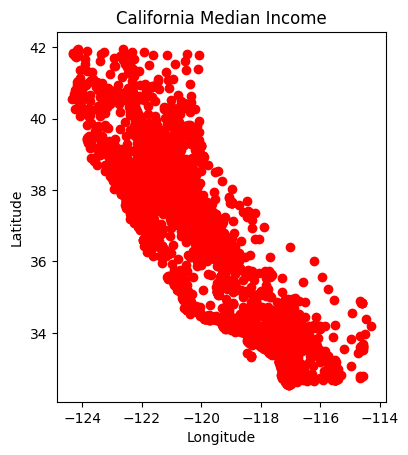

In [ ]:
import matplotlib.pyplot as plt

# All instances belong to the same cluster (we need it in order to use the
# 'plot_california_median_income_map' function).
X['cluster'] = 0

plot_california_median_income_map(None)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


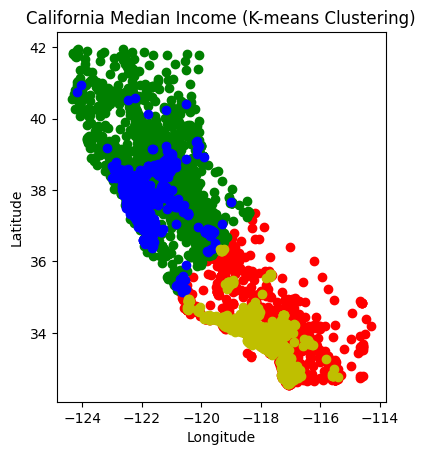

Silhouette score (for the K-means Clustering with 4 clusters): 0.42392141146013795


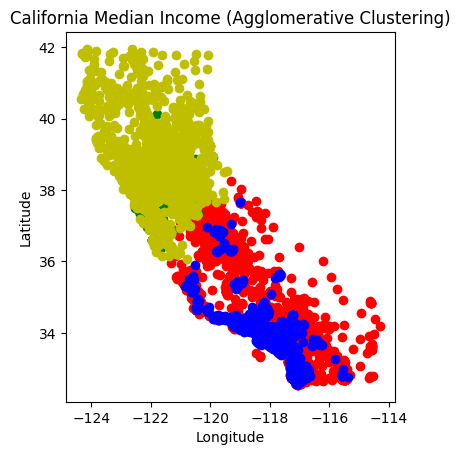

Silhouette score (for the Agglomerative Clustering with 4 clusters): 0.4044880805318701


In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

def cluster_and_get_silhoutte_score(clustering_alg):
  clustering_alg_instance = clustering_alg['class'](n_clusters=n_clusters)

  X['cluster'] = clustering_alg_instance.fit_predict(X)

  plot_california_median_income_map(clustering_alg['name'])

  print("Silhouette score (for the {} with {} clusters): {}".format(
      clustering_alg['name'],
      n_clusters,
      silhouette_score(X.drop(columns=['cluster']), X['cluster'])
  ))

clustering_algorithms = [
    { 'class': KMeans, 'name': 'K-means Clustering' },
    { 'class': AgglomerativeClustering, 'name': 'Agglomerative Clustering' },
]

for clustering_algorithm in clustering_algorithms:
  cluster_and_get_silhoutte_score(clustering_algorithm)

## 2. Implement kMeans in R/Python (without using the kmeans function or other packages).

In [ ]:
import random

def create_centroids(K):
  attributes_min_and_max = []

  for attribute_index in range(len(X.columns)):
    attributes_min_and_max.append([
        min(X.iloc[:, attribute_index]),
        max(X.iloc[:, attribute_index])
    ])

  centroids = []

  for cluster in range(K):
    centroid_attributes = []

    for attribute_index in range(len(attributes_min_and_max)):
      centroid_attributes.append(random.uniform(
          attributes_min_and_max[attribute_index][0],
          attributes_min_and_max[attribute_index][1])
      )

    centroids.append(centroid_attributes)

  return centroids

def get_manhattan_distance(point_a, point_b):
  distance = 0

  for dimension in range(len(point_a)):
    distance += abs(point_a[dimension] - point_b[dimension])

  return distance

def k_means_clustering(X, K):
  centroids = create_centroids(K)
  nr_of_data_points = len(X);

  y = [0] * nr_of_data_points

  while True:
    reassignment_occured = False

    # Assign each data point to the cluster corresponding to the closest
    # centroid.
    for i in range(nr_of_data_points):
      closest_centroid_id = 0
      closest_centroid_distance = float('inf')

      for centroid_id, centroid in enumerate(centroids):
        data_point_and_centroid_distance = get_manhattan_distance(
            X.iloc[i],
            centroid
        )

        if data_point_and_centroid_distance < closest_centroid_distance:
          closest_centroid_id = centroid_id
          closest_centroid_distance = data_point_and_centroid_distance

      if (y[i] != closest_centroid_id):
        y[i] = closest_centroid_id

        reassignment_occured = True

    # Update each centroid as mean of the data belonging to the corresponding
    # cluster.
    nr_of_data_points_in_clusters = [0] * len(centroids)
    sum_of_attributes_in_clusters = [
        [0] * len(centroids[0]) for i in range(len(centroids))
    ]

    for i in range(nr_of_data_points):
      cluster_id = y[i]

      for attribute_id, attribute in enumerate(X.iloc[i]):
        sum_of_attributes_in_clusters[cluster_id][attribute_id] += attribute

      nr_of_data_points_in_clusters[cluster_id] += 1

    for centroid_id, centroid in enumerate(centroids):
      new_centroid = []

      for attribute_id in range(len(centroid)):
        if nr_of_data_points_in_clusters[centroid_id] != 0:
          new_centroid.append(
              sum_of_attributes_in_clusters[centroid_id][attribute_id]
              / nr_of_data_points_in_clusters[centroid_id]
          )
        else:
          new_centroid.append(0)

      centroids[centroid_id] = new_centroid

    if not(reassignment_occured):
      break;

  return y

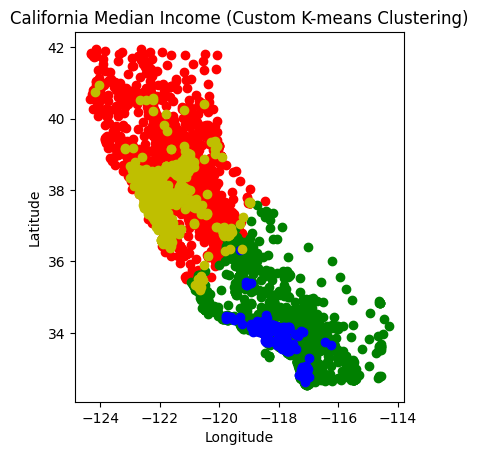

In [ ]:
X['cluster'] = k_means_clustering(X, n_clusters)

plot_california_median_income_map('Custom K-means Clustering')